In [1]:
import csv, sys
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from konlpy.tag import Okt
okt = Okt()

In [2]:
openFileName = '전자담배 증상_944_naver_blog.txt'
    
f = open(openFileName, 'r', encoding='utf-8')
data = f.read()
f.close()

In [3]:
data=data.replace('\n','')
for i in range(1,944):
    x="naver_blog_"+str(i)
    data=data.replace(x,"\n\n"+x+"  "+"\n")
f = open('전자담배증상_블로그_크롤링2', 'w', encoding='utf-8')
f.write(data)
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
openFileName = '전자담배증상_블로그_크롤링2'
    
f = open(openFileName, 'r', encoding='utf-8')
result = f.read()
f.close()

In [5]:
def tokenizer(raw, pos=["Noun"], stopword=[]): # 다른 품사 추가 원할 시 pos=["Noun", "Josa", ...]
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

data = tokenizer(result)

In [6]:
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [7]:
print(X)

  (0, 2490)	1
  (1, 13594)	1
  (2, 9067)	1
  (3, 10114)	1
  (4, 6288)	1
  (5, 11341)	1
  (6, 10776)	1
  (7, 8374)	1
  (8, 10125)	1
  (9, 6971)	1
  (10, 1061)	1
  (11, 10597)	1
  (12, 10806)	1
  (13, 8885)	1
  (14, 13594)	1
  (15, 2611)	1
  (16, 1032)	1
  (17, 2293)	1
  (18, 10597)	1
  (19, 5741)	1
  (20, 240)	1
  (21, 11000)	1
  (22, 285)	1
  (23, 5970)	1
  (24, 9587)	1
  :	:
  (224200, 1450)	1
  (224201, 2882)	1
  (224202, 8788)	1
  (224203, 13829)	1
  (224204, 12481)	1
  (224205, 10006)	1
  (224206, 10776)	1
  (224207, 12481)	1
  (224208, 3529)	1
  (224209, 13288)	1
  (224210, 4040)	1
  (224211, 5826)	1
  (224212, 4641)	1
  (224213, 2301)	1
  (224214, 10776)	1
  (224215, 8303)	1
  (224216, 5353)	1
  (224217, 11698)	1
  (224218, 9143)	1
  (224219, 8788)	1
  (224220, 7090)	1
  (224221, 1612)	1
  (224222, 8738)	1
  (224223, 3966)	1
  (224224, 1431)	1


In [8]:
print(vectorize.vocabulary_)

{'대구': 2490, '홍역': 13594, '유행': 9067, '전염': 10114, '성은': 6288, '초기': 11341, '증상': 10776, '예방접종': 8374, '전자담배': 10125, '시가': 6971, '광진구': 1061, '주말': 10597, '지난': 10806, '월요일': 8885, '대한': 2611, '관심': 1032, '다시': 2293, '사이': 5741, '감기': 240, '질병': 11000, '갑자기': 285, '상치': 5970, '일요일': 9587, '병원': 4965, '오늘': 8409, '겨우': 574, '처방': 11196, '현재': 13440, '지난해': 10810, '환자': 13686, '발생': 4587, '경기': 642, '시흥': 7074, '안산': 7588, '통틀어': 12276, '진자': 10960, '만큼': 3649, '얘기': 7847, '그냥': 1329, '수가': 6587, '거기': 428, '다가': 2257, '이하': 9411, '유아': 9023, '나머지': 1788, '의료': 9185, '진과': 10926, '부모님': 5179, '하니아': 12997, '어른': 7866, '서울': 6133, '확진': 13662, '확정': 13661, '지금': 10799, '완치': 8587, '동남아시아': 2851, '바이러스': 4454, '확인': 13659, '무슨': 4147, '연관': 8202, '정도': 10258, '관계자': 1010, '전혀': 10152, '다른': 2274, '타입': 12065, '유형': 9070, '전파': 10146, '동남아': 2850, '일부': 9560, '유럽': 8985, '시작': 7041, '남미': 1880, '확산': 13654, '설명': 6233, '해외': 13276, '유입': 9038, '구나': 1125, '퇴치': 12292, '선언': 6197, '우리나라': 8

In [9]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(vectorize.fit_transform(data)).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'대구': 30,
 '홍역': 19,
 '유행': 24,
 '전염': 10,
 '성은': 40,
 '초기': 174,
 '증상': 1750,
 '예방접종': 3,
 '전자담배': 10528,
 '시가': 105,
 '광진구': 13,
 '주말': 54,
 '지난': 116,
 '월요일': 44,
 '대한': 522,
 '관심': 143,
 '다시': 433,
 '사이': 111,
 '감기': 122,
 '질병': 136,
 '갑자기': 138,
 '상치': 3,
 '일요일': 43,
 '병원': 156,
 '오늘': 637,
 '겨우': 25,
 '처방': 20,
 '현재': 226,
 '지난해': 25,
 '환자': 158,
 '발생': 693,
 '경기': 40,
 '시흥': 3,
 '안산': 12,
 '통틀어': 1,
 '진자': 5,
 '만큼': 93,
 '얘기': 110,
 '그냥': 364,
 '수가': 100,
 '거기': 112,
 '다가': 41,
 '이하': 50,
 '유아': 10,
 '나머지': 37,
 '의료': 32,
 '진과': 2,
 '부모님': 10,
 '하니아': 2,
 '어른': 10,
 '서울': 77,
 '확진': 6,
 '확정': 7,
 '지금': 382,
 '완치': 12,
 '동남아시아': 2,
 '바이러스': 43,
 '확인': 342,
 '무슨': 54,
 '연관': 44,
 '정도': 979,
 '관계자': 10,
 '전혀': 208,
 '다른': 521,
 '타입': 73,
 '유형': 20,
 '전파': 8,
 '동남아': 2,
 '일부': 88,
 '유럽': 32,
 '시작': 532,
 '남미': 1,
 '확산': 20,
 '설명': 344,
 '해외': 74,
 '유입': 90,
 '구나': 7,
 '퇴치': 3,
 '선언': 7,
 '우리나라': 85,
 '세계보건기구': 38,
 '태평양': 1,
 '지역': 38,
 '인증': 100,
 '위원회': 9,
 '로부터': 41,
 '나라': 28,


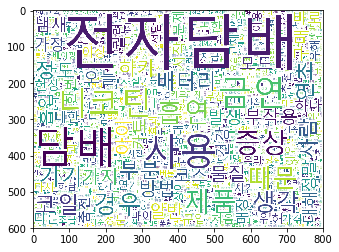

In [12]:
from wordcloud import WordCloud

w=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
#plt.axis(&quot;off&quot;)
plt.show()

In [13]:
vectorizeT = TfidfVectorizer()

Y = vectorizeT.fit_transform(data)

print(vectorize.vocabulary_) # 단어집의 콘텐츠를 나타낸다. value값은 인덱스를 나타낸다.
print(Y.toarray()) # 단어집에 있는 단어들의 각각의 카운트 갯수를 나타낸다.

{'대구': 2490, '홍역': 13594, '유행': 9067, '전염': 10114, '성은': 6288, '초기': 11341, '증상': 10776, '예방접종': 8374, '전자담배': 10125, '시가': 6971, '광진구': 1061, '주말': 10597, '지난': 10806, '월요일': 8885, '대한': 2611, '관심': 1032, '다시': 2293, '사이': 5741, '감기': 240, '질병': 11000, '갑자기': 285, '상치': 5970, '일요일': 9587, '병원': 4965, '오늘': 8409, '겨우': 574, '처방': 11196, '현재': 13440, '지난해': 10810, '환자': 13686, '발생': 4587, '경기': 642, '시흥': 7074, '안산': 7588, '통틀어': 12276, '진자': 10960, '만큼': 3649, '얘기': 7847, '그냥': 1329, '수가': 6587, '거기': 428, '다가': 2257, '이하': 9411, '유아': 9023, '나머지': 1788, '의료': 9185, '진과': 10926, '부모님': 5179, '하니아': 12997, '어른': 7866, '서울': 6133, '확진': 13662, '확정': 13661, '지금': 10799, '완치': 8587, '동남아시아': 2851, '바이러스': 4454, '확인': 13659, '무슨': 4147, '연관': 8202, '정도': 10258, '관계자': 1010, '전혀': 10152, '다른': 2274, '타입': 12065, '유형': 9070, '전파': 10146, '동남아': 2850, '일부': 9560, '유럽': 8985, '시작': 7041, '남미': 1880, '확산': 13654, '설명': 6233, '해외': 13276, '유입': 9038, '구나': 1125, '퇴치': 12292, '선언': 6197, '우리나라': 8

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
import operator

freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, idx in vectorizeT.vocabulary_.items()]
dict_result = dict(freqs_TFIDF)

# value(단어별 빈도수)를 기준으로 내림차순 정렬
# sort_result : 튜플을 항목으로 갖는 리스트
sort_result = sorted(dict_result.items(), reverse=True, key=operator.itemgetter(1))

for d in sort_result :
    print(d)

('전자담배', 10528.0)
('담배', 4286.0)
('사용', 3316.0)
('금연', 2779.0)
('니코틴', 2445.0)
('증상', 1750.0)
('흡연', 1699.0)
('제품', 1656.0)
('때문', 1482.0)
('경우', 1382.0)
('생각', 1302.0)
('코일', 1199.0)
('기기', 1184.0)
('부분', 1000.0)
('정도', 979.0)
('배터리', 975.0)
('사람', 966.0)
('연초', 961.0)
('방법', 781.0)
('아이', 771.0)
('하카', 759.0)
('가지', 757.0)
('물질', 734.0)
('부작용', 710.0)
('발생', 693.0)
('일반', 689.0)
('모드', 654.0)
('오늘', 637.0)
('냄새', 628.0)
('코스', 626.0)
('흡입', 626.0)
('대해', 618.0)
('구매', 598.0)
('정말', 593.0)
('카토', 588.0)
('가장', 574.0)
('건강', 558.0)
('바로', 552.0)
('하나', 542.0)
('시작', 532.0)
('매장', 532.0)
('충전', 531.0)
('궐련', 530.0)
('한번', 523.0)
('대한', 522.0)
('다른', 521.0)
('현상', 521.0)
('문제', 518.0)
('이상', 512.0)
('위해', 509.0)
('또한', 508.0)
('처음', 506.0)
('느낌', 487.0)
('마이', 487.0)
('시간', 483.0)
('교체', 478.0)
('구입', 464.0)
('추천', 461.0)
('연기', 441.0)
('이유', 440.0)
('유해', 437.0)
('도움', 434.0)
('전담', 434.0)
('상태', 434.0)
('다시', 433.0)
('성분', 432.0)
('이용', 430.0)
('결과', 429.0)
('상이', 426.0)
('사실', 418.0)


('공부', 12.0)
('램프', 12.0)
('맥스', 12.0)
('아래쪽', 12.0)
('스톰', 12.0)
('중금속', 12.0)
('피해자', 12.0)
('사은', 12.0)
('스팀', 12.0)
('간격', 12.0)
('게이지', 12.0)
('슬러지', 12.0)
('편도', 12.0)
('미용', 12.0)
('체온', 12.0)
('객혈', 12.0)
('대용', 12.0)
('건강검진', 12.0)
('헛구역질', 12.0)
('트럼프', 12.0)
('참가자', 12.0)
('천명', 12.0)
('난독증', 12.0)
('식품의약품안전처', 12.0)
('산화질소', 12.0)
('필립스', 12.0)
('식도암', 12.0)
('청원', 12.0)
('슬러쉬', 12.0)
('롱소드', 12.0)
('강서구', 12.0)
('패스워드', 12.0)
('던칸', 12.0)
('그간', 11.0)
('두피', 11.0)
('케이크', 11.0)
('쥴팟', 11.0)
('질리', 11.0)
('경쟁', 11.0)
('내뿜는', 11.0)
('편리', 11.0)
('기원', 11.0)
('도의', 11.0)
('조화', 11.0)
('솔루션', 11.0)
('유행병', 11.0)
('옛날', 11.0)
('과세', 11.0)
('리기', 11.0)
('해석', 11.0)
('만일', 11.0)
('발달', 11.0)
('작심삼일', 11.0)
('일어난다', 11.0)
('인후', 11.0)
('공중보건', 11.0)
('마케팅', 11.0)
('젊은이', 11.0)
('임산부', 11.0)
('무작위', 11.0)
('경과', 11.0)
('영어', 11.0)
('시설', 11.0)
('날로', 11.0)
('임신', 11.0)
('볼때', 11.0)
('살수', 11.0)
('차별', 11.0)
('고양이', 11.0)
('생명', 11.0)
('지난번', 11.0)
('건데', 11.0)
('도장', 11.0)
('요것', 1

('상봉', 5.0)
('샴푸', 5.0)
('유일', 5.0)
('코원', 5.0)
('노르에피네프린', 5.0)
('생리통', 5.0)
('성서', 5.0)
('계대', 5.0)
('신당동', 5.0)
('용지', 5.0)
('은평구', 5.0)
('정벌', 5.0)
('공유기', 5.0)
('년도', 5.0)
('도우미', 5.0)
('돈트', 5.0)
('와이드', 5.0)
('영대', 5.0)
('교하', 5.0)
('영등포', 5.0)
('장성', 5.0)
('법인', 5.0)
('면솜', 5.0)
('황소', 5.0)
('제우스', 5.0)
('홍관', 5.0)
('갈등', 5.0)
('멍울', 5.0)
('동암', 5.0)
('학익동', 5.0)
('감염병', 4.0)
('예외', 4.0)
('삼성동', 4.0)
('인근', 4.0)
('애프터서비스', 4.0)
('조제', 4.0)
('신후', 4.0)
('프렌치', 4.0)
('정품팟', 4.0)
('승리', 4.0)
('노예', 4.0)
('분출', 4.0)
('쾌쾌', 4.0)
('조카', 4.0)
('여하튼', 4.0)
('야금', 4.0)
('히팅컵', 4.0)
('꼽는다', 4.0)
('그을음', 4.0)
('엊그제', 4.0)
('바깥', 4.0)
('반영구', 4.0)
('타이밍', 4.0)
('기일', 4.0)
('대학원', 4.0)
('정일', 4.0)
('의의', 4.0)
('부속품', 4.0)
('개산', 4.0)
('감시', 4.0)
('넷째', 4.0)
('자율', 4.0)
('수백', 4.0)
('서양', 4.0)
('부문', 4.0)
('충성', 4.0)
('유추', 4.0)
('도처', 4.0)
('생활환경', 4.0)
('순응', 4.0)
('평상', 4.0)
('올바로', 4.0)
('순식간', 4.0)
('이목', 4.0)
('들불', 4.0)
('획득', 4.0)
('해인', 4.0)
('북미', 4.0)
('동등', 4.0)
('관성', 4.0)
('방사'

('진피', 2.0)
('타투', 2.0)
('임팩트', 2.0)
('리트', 2.0)
('패털', 2.0)
('도깨비', 2.0)
('언락', 2.0)
('발시', 2.0)
('여수', 2.0)
('교동', 2.0)
('풍경', 2.0)
('홍어', 2.0)
('간지', 2.0)
('테린', 2.0)
('인내', 2.0)
('지혜', 2.0)
('점주', 2.0)
('담배속', 2.0)
('비약', 2.0)
('판매업', 2.0)
('앱솔', 2.0)
('명꼴', 2.0)
('코틴', 2.0)
('흡족', 2.0)
('에어로', 2.0)
('띤다', 2.0)
('맛보기', 2.0)
('헹궈', 2.0)
('부합', 2.0)
('이수', 2.0)
('초청', 2.0)
('우수', 2.0)
('제약회사', 2.0)
('코발트', 2.0)
('피아노', 2.0)
('뿌듯', 2.0)
('헝겊', 2.0)
('그래픽', 2.0)
('예비', 2.0)
('썬더킷', 2.0)
('어그', 2.0)
('고광택', 2.0)
('경북', 2.0)
('옆구리', 2.0)
('사이드', 2.0)
('될껍니', 2.0)
('아담', 2.0)
('스키', 2.0)
('중량', 2.0)
('고난', 2.0)
('도정', 2.0)
('포승', 2.0)
('요안', 2.0)
('헬로키티', 2.0)
('절박', 2.0)
('이진', 2.0)
('솔이', 2.0)
('찹쌀떡', 2.0)
('모찌', 2.0)
('바치', 2.0)
('치즈', 2.0)
('라무네', 2.0)
('재품', 2.0)
('수시', 2.0)
('구로구', 2.0)
('대림', 2.0)
('무궁무진', 2.0)
('다크서클', 2.0)
('인슐린', 2.0)
('관절염', 2.0)
('실컷', 2.0)
('요요', 2.0)
('끝내', 2.0)
('가인', 2.0)
('편성', 2.0)
('기다림', 2.0)
('때마침', 2.0)
('번거러움', 2.0)
('승일', 2.0)
('디젤', 2.0)
('듣보잡', 2

('주얼', 1.0)
('기하학', 1.0)
('잔기스', 1.0)
('방역', 1.0)
('옐로', 1.0)
('수나', 1.0)
('밀면', 1.0)
('노령', 1.0)
('밑단', 1.0)
('지안', 1.0)
('딥니', 1.0)
('대문', 1.0)
('하룻밤', 1.0)
('대니', 1.0)
('미끼', 1.0)
('사색', 1.0)
('밤새', 1.0)
('미학', 1.0)
('오르다', 1.0)
('기름값', 1.0)
('파라솔', 1.0)
('미비', 1.0)
('고자', 1.0)
('시궁창', 1.0)
('가망', 1.0)
('이해관계', 1.0)
('희소식', 1.0)
('요사', 1.0)
('텐데요하', 1.0)
('베다', 1.0)
('도생', 1.0)
('데비', 1.0)
('향또', 1.0)
('이색', 1.0)
('같릴', 1.0)
('은부', 1.0)
('용건', 1.0)
('처지', 1.0)
('액사', 1.0)
('화합물질', 1.0)
('지적도', 1.0)
('브러쉬', 1.0)
('극장', 1.0)
('충전잔량', 1.0)
('때마', 1.0)
('후위', 1.0)
('브렌드', 1.0)
('고대로', 1.0)
('스카디', 1.0)
('데체', 1.0)
('금낚증상', 1.0)
('짬낚빼', 1.0)
('어청도', 1.0)
('논걸', 1.0)
('리좀', 1.0)
('지푸라기', 1.0)
('트렸', 1.0)
('대추나무', 1.0)
('판박이', 1.0)
('단서', 1.0)
('솜씨', 1.0)
('명탐정', 1.0)
('코난', 1.0)
('위저', 1.0)
('이볼브사', 1.0)
('신나라', 1.0)
('토포', 1.0)
('인스톨', 1.0)
('멍청', 1.0)
('무슥', 1.0)
('시운전', 1.0)
('슷프', 1.0)
('워토포', 1.0)
('뭉개구름', 1.0)
('추인', 1.0)
('세모', 1.0)
('똬닷', 1.0)
('출입구', 1.0)
('답장', 1.0)
('리리', 1.0)


('보주', 1.0)
('고적', 1.0)
('출판사', 1.0)
('노필', 1.0)
('문명', 1.0)
('생활수준', 1.0)
('자가용', 1.0)
('정원', 1.0)
('단독주택', 1.0)
('가계비', 1.0)
('기세', 1.0)
('유급', 1.0)
('별장', 1.0)
('식도락', 1.0)
('유산', 1.0)
('마르세유', 1.0)
('몽블랑', 1.0)
('코트다쥐르', 1.0)
('알자스', 1.0)
('노르망디', 1.0)
('브르타뉴', 1.0)
('오베르뉴', 1.0)
('원지', 1.0)
('향토색', 1.0)
('노안', 1.0)
('측두부', 1.0)
('신경세포', 1.0)
('류마티즘', 1.0)
('편두', 1.0)
('축녹증', 1.0)
('발성', 1.0)
('십년', 1.0)
('발짝', 1.0)
('에누구', 1.0)
('색안경', 1.0)
('뱌뱌', 1.0)
('촘촘하', 1.0)
('이이이', 1.0)
('기스난', 1.0)
('눈덩이', 1.0)
('한소리', 1.0)
('빠트리', 1.0)
('띠디딕', 1.0)
('걸꽤', 1.0)
('미티', 1.0)
('리미', 1.0)
('디짓', 1.0)
('검배', 1.0)
('무화량증', 1.0)
('초특', 1.0)
('박하나', 1.0)
('기프트', 1.0)
('키티', 1.0)
('이인재', 1.0)
('소사', 1.0)
('개미지옥', 1.0)
('삼각형', 1.0)
('프핏', 1.0)
('어린이병원', 1.0)
('김붕년', 1.0)
('김재원', 1.0)
('예방의학', 1.0)
('교실', 1.0)
('홍윤', 1.0)
('직법', 1.0)
('코티닌등', 1.0)
('코티닌', 1.0)
('동성', 1.0)
('철자법', 1.0)
('인지발달', 1.0)
('학습장애', 1.0)
('구책', 1.0)
('켯으', 1.0)
('조선', 1.0)
('있스니', 1.0)
('진상', 1.0)
('앓이', 1.0)
('무소식', 1.0)
('

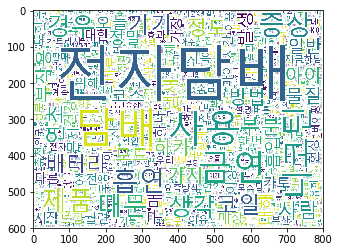

In [15]:
w1=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs_TFIDF))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(w1)
plt.show()